In [2]:
import pandas as pd

In [3]:
myDataset = pd.read_csv("Health_Risk_Prediction.csv")

In [4]:
myDataset

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,75,187,medium,7.2,low,no,no,yes,driver,21.4,low
4996,39,86,183,low,7.4,low,no,no,yes,engineer,25.7,high
4997,48,56,194,none,7.2,high,yes,yes,yes,engineer,14.9,high
4998,34,109,148,medium,9.9,medium,no,no,yes,doctor,49.8,low


In [5]:
myDataset.isnull().sum()
#Handling the INPUT DATA -
#1) Update the missing values using CEntral Tendancy - mean,median,mode
#2) DElete the Entire Row if not impacted
#3) With respect to the problem , update the missing values
#4) Apply Semi-Supervised, Create a model , predict the values and update the missing data.

age             0
weight          0
height          0
exercise        0
sleep           0
sugar_intake    0
smoking         0
alcohol         0
married         0
profession      0
bmi             0
health_risk     0
dtype: int64

In [6]:
def quanqual(myDataset):
    quan=[]
    qual=[]
    for ColumnName in myDataset.columns:
           # print(ColumnName)
            if (myDataset[ColumnName].dtype=='O'):
#print("it is quantitative variable / column")   #numbers may be discrete or continous
                qual.append(ColumnName)
            else:
               # print("it is qualitative variable / column")      # Categorical data - nominal, or ordinal
                quan.append(ColumnName)
    return quan,qual

In [7]:
quan_col,qual_col = quanqual(myDataset)

In [8]:
myDataset[quan_col]

,age,weight,height,sleep,bmi
0,56,67,195,6.1,17.6
1,69,76,170,6.9,26.3
2,46,106,153,6.6,45.3
3,32,54,186,8.5,15.6
4,60,98,195,8.0,25.8
...,...,...,...,...,...
4995,42,75,187,7.2,21.4
4996,39,86,183,7.4,25.7
4997,48,56,194,7.2,14.9
4998,34,109,148,9.9,49.8


In [9]:
myDataset[qual_col]

,exercise,sugar_intake,smoking,alcohol,married,profession,health_risk
0,low,medium,yes,yes,yes,office_worker,high
1,high,high,no,no,no,teacher,high
2,high,low,yes,no,no,artist,high
3,medium,medium,no,no,no,artist,low
4,high,low,no,no,yes,teacher,high
...,...,...,...,...,...,...,...
4995,medium,low,no,no,yes,driver,low
4996,low,low,no,no,yes,engineer,high
4997,none,high,yes,yes,yes,engineer,high
4998,medium,medium,no,no,yes,doctor,low


In [10]:
myDataset[quan_col].corr()

,age,weight,height,sleep,bmi
age,1.000000,0.010220,0.020501,-0.022504,-0.011407
weight,0.010220,1.000000,0.001637,-0.012756,0.784869
height,0.020501,0.001637,1.000000,-0.016776,-0.596046
sleep,-0.022504,-0.012756,-0.016776,1.000000,-0.001544
bmi,-0.011407,0.784869,-0.596046,-0.001544,1.000000


In [11]:
myDataset[quan_col].cov()

,age,weight,height,sleep,bmi
age,320.660341,3.424913,5.808376,-0.577407,-1.685687
weight,3.424913,350.235022,0.484691,-0.342052,121.216502
height,5.808376,0.484691,250.342806,-0.380332,-77.827354
sleep,-0.577407,-0.342052,-0.380332,2.053056,-0.018261
bmi,-1.685687,121.216502,-77.827354,-0.018261,68.103587


In [17]:
#Multi colinearity should not be present in the data set. 
#Types : Structural Muti colinearity and Data Multi colinearity
# VARIENCE INFLATION FACTOR - VIF 
# VIF is to remove the muti colinearity in the dataset.

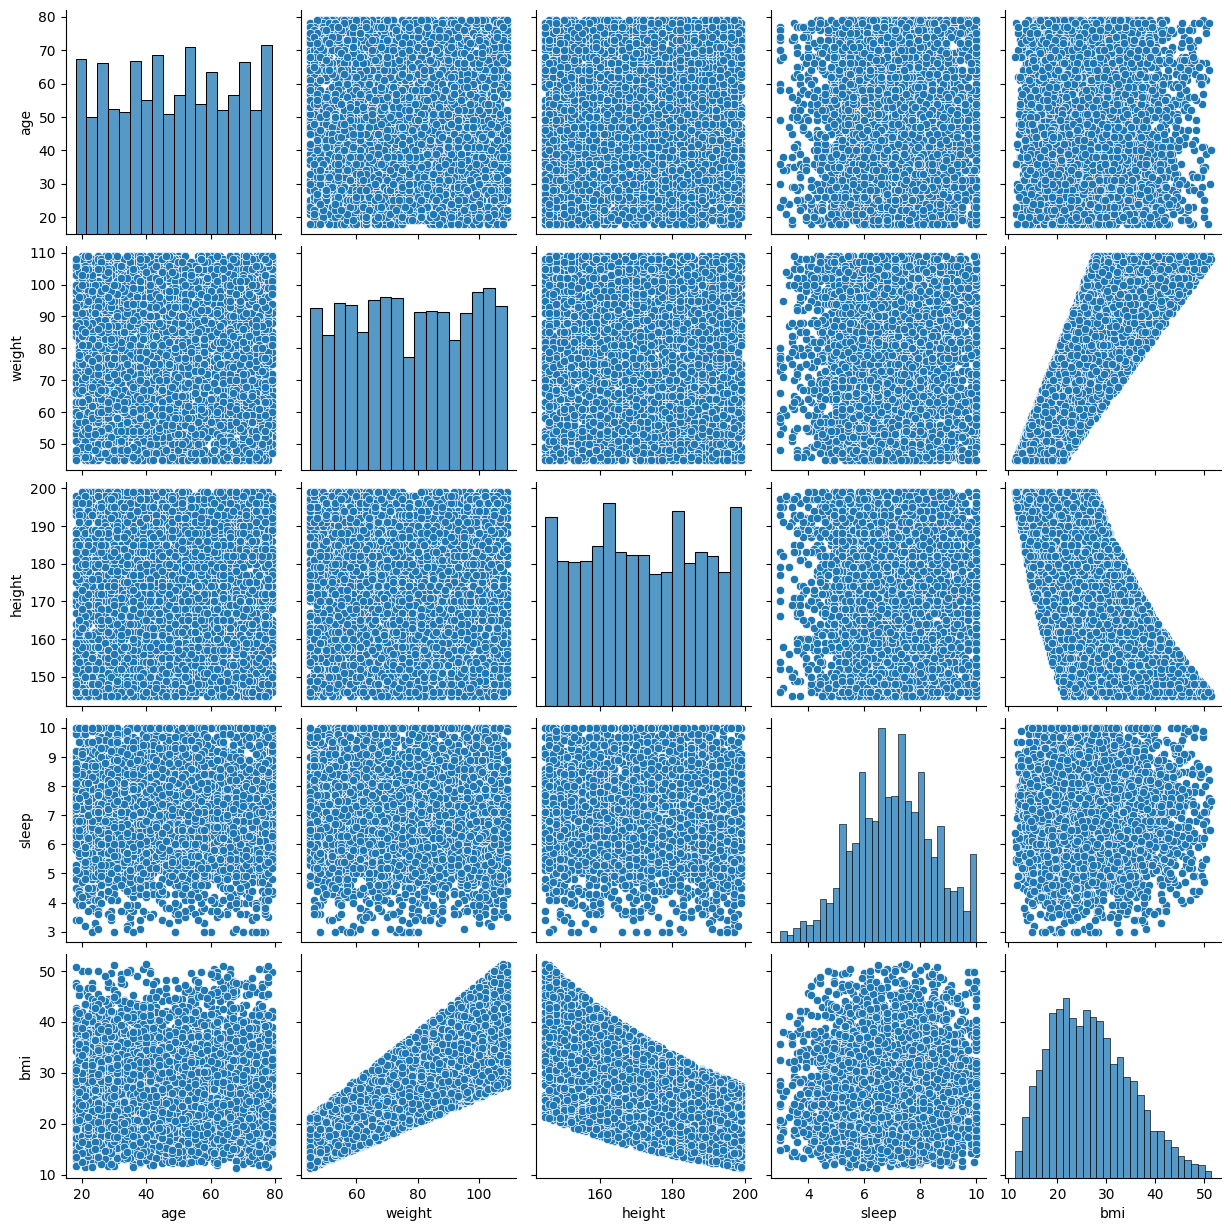

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(myDataset) # Dataset with Serial number.



In [13]:
# Computes the Variance Inflation Factor (VIF) for each numeric column
#from statsmodels.stats.ouliers_influence import varience_inflation_factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(x_input):
              
        vif_data = pd.DataFrame()
        vif_data["varibles"] = x_input.columns
        vif_data["VIF"] = [ 
            variance_inflation_factor(x_input.values, i ) 
            for i in range(x_input.shape[1])
        ] 
        return vif_data

In [14]:
quan_col,qual_col = quanqual(myDataset)
calculate_vif(myDataset[quan_col])

,varibles,VIF
0,age,8.364266
1,weight,74.316432
2,height,48.770819
3,sleep,24.430931
4,bmi,41.513199


In [15]:
calculate_vif(myDataset[["sleep","bmi","age"]])

,varibles,VIF
0,sleep,10.923540
1,bmi,8.712079
2,age,6.842542


             age    weight    height     sleep       bmi
age     1.000000  0.010220  0.020501 -0.022504 -0.011407
weight  0.010220  1.000000  0.001637 -0.012756  0.784869
height  0.020501  0.001637  1.000000 -0.016776 -0.596046
sleep  -0.022504 -0.012756 -0.016776  1.000000 -0.001544
bmi    -0.011407  0.784869 -0.596046 -0.001544  1.000000


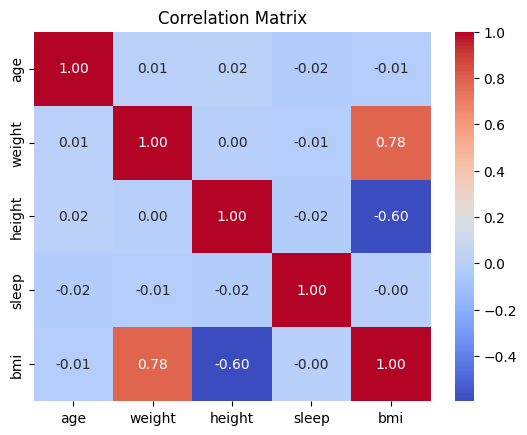

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = myDataset[quan_col].select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

               age      weight      height     sleep         bmi
age     320.660341    3.424913    5.808376 -0.577407   -1.685687
weight    3.424913  350.235022    0.484691 -0.342052  121.216502
height    5.808376    0.484691  250.342806 -0.380332  -77.827354
sleep    -0.577407   -0.342052   -0.380332  2.053056   -0.018261
bmi      -1.685687  121.216502  -77.827354 -0.018261   68.103587


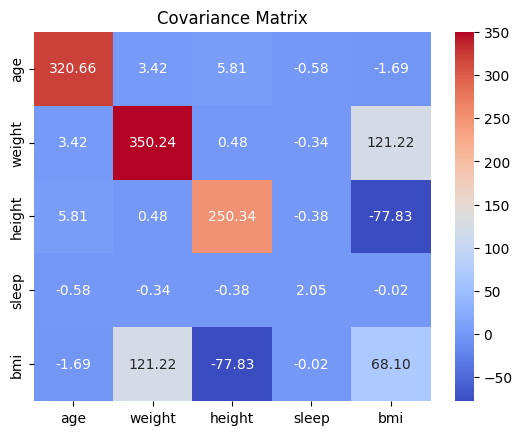

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = myDataset[quan_col].select_dtypes(include=['number'])
cov_matrix = numeric_df.cov()
print(cov_matrix)
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Covariance Matrix")
plt.show()

In [18]:
#Similarity between sugar intake and BMI
from scipy.stats import ttest_ind
ht_dataset= myDataset.dropna()
h_sugar =myDataset[myDataset["sugar_intake"]=='high']["bmi"]
l_sugar =myDataset[myDataset["sugar_intake"]=='low']["bmi"]
ttest_ind(h_sugar,l_sugar)

TtestResult(statistic=-1.792289375425736, pvalue=0.07320813192591366, df=2487.0)

In [19]:
from scipy.stats import ttest_ind
ht_dataset= myDataset.dropna()
l_exe =myDataset[myDataset["exercise"]=='low']["bmi"]
h_exe =myDataset[myDataset["exercise"]=='high']["bmi"]
ttest_ind(l_exe,h_exe)

TtestResult(statistic=0.7652182088316188, pvalue=0.4442211668364143, df=2270.0)

In [32]:
ht_dataset['health_risk'] = ht_dataset['health_risk'].replace({
    'low': 1,
    'medium': 2,
    'high': 3
})

C:\Users\USER\AppData\Local\Temp\ipykernel_2312\454674025.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ht_dataset['health_risk'] = ht_dataset['health_risk'].replace({


In [33]:
ht_dataset

,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,3
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,3
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,3
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,1
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,3
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,42,75,187,medium,7.2,low,no,no,yes,driver,21.4,1
4996,39,86,183,low,7.4,low,no,no,yes,engineer,25.7,3
4997,48,56,194,none,7.2,high,yes,yes,yes,engineer,14.9,3
4998,34,109,148,medium,9.9,medium,no,no,yes,doctor,49.8,1


In [34]:
from scipy.stats import ttest_ind
#ht_dataset= myDataset.dropna()

l_exe =ht_dataset[ht_dataset["profession"]=='teacher']["health_risk"]
h_exe =ht_dataset[ht_dataset["profession"]=='doctor']["health_risk"]
ttest_ind(l_exe,h_exe)

TtestResult(statistic=1.611400091248866, pvalue=0.10734703404317406, df=1240.0)

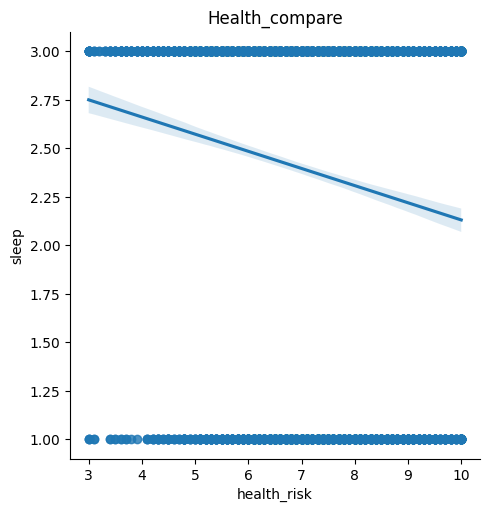

In [38]:
sns.lmplot(x='sleep', y='health_risk', data=ht_dataset)
plt.title('Health_compare')
plt.xlabel('health_risk')
plt.ylabel('sleep')
plt.show()

myDataset.columns

In [39]:
myDataset.columns

Index(['age', 'weight', 'height', 'exercise', 'sleep', 'sugar_intake',
       'smoking', 'alcohol', 'married', 'profession', 'bmi', 'health_risk'],
      dtype='object')

In [40]:
quan_col

['age', 'weight', 'height', 'sleep', 'bmi']

In [82]:
import numpy as np
np.percentile(myDataset["age"],25) 


34.0

In [83]:
#from Univariate import Univariate
## How to call from the class????
def univariate(myDataset,quan_col):
        descriptive_table = pd.DataFrame(index=["mean","median","mode","min","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","max","IQR","1.5Rule","lesser","greater",
                                     "skew","kurtosis","var","std"],columns=quan_col)
        for columnName in quan_col:
            descriptive_table.loc["mean", columnName] = myDataset[columnName].mean()
            descriptive_table.loc["median", columnName] = myDataset[columnName].median()
            descriptive_table.loc["mode", columnName] = myDataset[columnName].mode()[0] 
            descriptive_table.loc["min", columnName] = myDataset[columnName].min()
            descriptive_table.loc["max", columnName] = myDataset[columnName].max()
            descriptive_table.loc["Q1:25%", columnName] = myDataset.describe()[columnName]["25%"]
            descriptive_table.loc["Q2:50%", columnName] = myDataset.describe()[columnName]["50%"]
            descriptive_table.loc["Q3:75%", columnName] = myDataset.describe()[columnName]["75%"]
            descriptive_table.loc["99%", columnName] = np.percentile(myDataset[columnName],99)
            descriptive_table.loc["Q4:100%", columnName] = myDataset.describe()[columnName]["max"]
            descriptive_table.loc["IQR", columnName] = descriptive_table.loc["Q3:75%", columnName] - descriptive_table.loc["Q1:25%", columnName]
            descriptive_table.loc["1.5Rule", columnName] = descriptive_table.loc["IQR", columnName]*1.5
            descriptive_table.loc["lesser", columnName] = descriptive_table.loc["Q1:25%", columnName] - descriptive_table.loc["1.5Rule", columnName]
            descriptive_table.loc["greater", columnName] = descriptive_table.loc["Q3:75%", columnName] + descriptive_table.loc["1.5Rule", columnName]
            descriptive_table.loc["skew", columnName] = myDataset[columnName].skew()
            descriptive_table.loc["kurtosis", columnName] = myDataset[columnName].kurtosis()
            descriptive_table.loc["var", columnName] = myDataset[columnName].var()
            descriptive_table.loc["std", columnName] = myDataset[columnName].std()
    
        return descriptive_table

In [84]:
descriptive_table=univariate(myDataset,quan_col)

In [85]:
#Find and Replace the ouliers
def findOutlier():  #find the oulier in the quantitative cloumns.
    lesser=[]
    greater=[]
    
    for columnName in quan_col:
        if (descriptive_table.loc["min", columnName] < descriptive_table.loc["lesser", columnName]):
            lesser.append(columnName)
        if ((descriptive_table.loc["max", columnName]) >(descriptive_table.loc["greater", columnName])) :
            greater.append(columnName)
    print("lesser outlier column",lesser )
    print("greater outlier column",greater )
    return lesser,greater

In [86]:
lesser,greater=findOutlier()

lesser outlier column []
greater outlier column ['bmi']


In [87]:
descriptive_table

,age,weight,height,sleep,bmi
mean,48.8056,77.3592,171.9332,6.99706,26.84388
median,49.0,77.0,171.5,7.0,26.0
mode,77,98,157,6.8,26.0
min,18,45,145,3.0,11.4
Q1:25%,34.0,61.0,158.0,6.0,20.3
Q2:50%,49.0,77.0,171.5,7.0,26.0
Q3:75%,64.0,94.0,186.0,8.0,32.4
99%,79.0,109.0,199.0,10.0,47.7
Q4:100%,79.0,109.0,199.0,10.0,51.4
max,79,109,199,10.0,51.4


In [100]:
def clean_data():
    for columnName in lesser:
    #Replace lesser ouliners
        myDataset.loc[
            myDataset[columnName] < descriptive_table.loc["lesser", columnName],columnName] = descriptive_table.loc["lesser", columnName]
    
    #  Replace greater outliers
    for columnName in greater:
        myDataset.loc[
            myDataset[columnName] > descriptive_table.loc["greater", columnName],
            columnName
        ] = descriptive_table.loc["greater", columnName] 
    return(descriptive_table)

In [101]:
clean_data()

,age,weight,height,sleep,bmi
mean,48.8056,77.3592,171.9332,6.99706,26.84388
median,49.0,77.0,171.5,7.0,26.0
mode,77,98,157,6.8,26.0
min,18,45,145,3.0,11.4
Q1:25%,34.0,61.0,158.0,6.0,20.3
Q2:50%,49.0,77.0,171.5,7.0,26.0
Q3:75%,64.0,94.0,186.0,8.0,32.4
99%,79.0,109.0,199.0,10.0,47.7
Q4:100%,79.0,109.0,199.0,10.0,51.4
max,79,109,199,10.0,51.4


In [102]:
lesser,greater=findOutlier()

lesser outlier column []
greater outlier column ['bmi']
